In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from lab_processing import create_plot

In [2]:
df1 = pd.read_csv('data/vah1.tsv', sep='\t')
df2 = pd.read_csv('data/vah2.tsv', sep='\t')
df3 = pd.read_csv('data/vah3.tsv', sep='\t')

<AxesSubplot:xlabel='v1', ylabel='v2'>

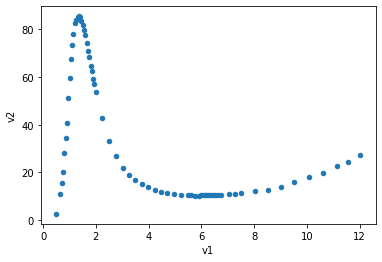

In [3]:
df1.plot(x='v1', y='v2', kind='scatter')

<AxesSubplot:xlabel='v1', ylabel='v2'>

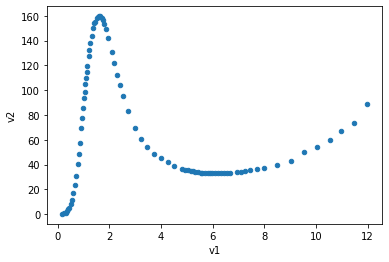

In [4]:
df2.plot(x='v1', y='v2', kind='scatter')

<AxesSubplot:xlabel='v1', ylabel='v2'>

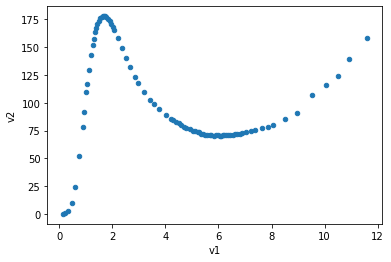

In [5]:
df3.plot(x='v1', y='v2', kind='scatter')

In [6]:
h = 4.135e-15
m_e = 0.511e6 / (3e18)**2

def l(E):
    U0 = 2.5
    return h / (2 * (2 * m_e * (E + U0))**0.5)

def l1(E1, E2, sigma=False):
    E_sig = 0.2*(2**0.5)
    l = h*(5**0.5)/(32*m_e*(E2-E1))**0.5
    sig = (((E_sig**2 + (E_sig)**2)**0.5)/(2*(E2-E1))) * l
    if sigma:
        return l, sig
    return l

def l1_static(E1, E2, sigma=False):
    l = h*(5**0.5)/(32*m_e*(E2[0]-E1[0]))**0.5
    sig = (((E1[1])**2 + (E2[1])**2)**0.5)/2/(E2[0]-E1[0]) * l
    if sigma:
        return l, sig
    return l

def u_static(E1, E2, sigma=False):
    u = 4/5*E2[0] - 9/5*E1[0]
    sig = ((4/5*E2[1])**2 + (9/5*E1[1])**2)**0.5
    if sigma:
        return u, sig
    return u

# Динамический режим

## 1

In [7]:
E_sig = 0.2*(2**0.5)

In [8]:
E1 = 2.6; E2 = 5.6

In [9]:
l(E1), l(E1)*(E_sig/(2*E1))

(2.716791044607988, 0.14777395159301485)

In [10]:
3/2*l(E2), 3/2*l(E2)*(E_sig/(2*E2))

(3.233628133395685, 0.08166144217713169)

In [11]:
l1(E1, E2, sigma=True)

(3.960369472363923, 0.2640246314909283)

In [12]:
# Глубина потенциальной ямы

U0 = 4/5 * E2 - 9/5 * E1
U0

-0.20000000000000107

## 2

In [13]:
E1 = 3; E2 = 5.8
l(E1), l(E1)*(E_sig/(2*E1))

(2.6161339713511693, 0.12332573810899368)

In [14]:
3/2*l(E2), 3/2*l(E2)*(E_sig/(2*E2))

(3.19443119229619, 0.0778897916588436)

In [15]:
l1(E1, E2, sigma=True)

(4.099371862723792, 0.29281227590884235)

In [16]:
# Глубина потенциальной ямы

U0 = 4/5 * E2 - 9/5 * E1
U0

-0.7600000000000007

# Статический режим

In [17]:
def E_n(E1, E2, n, sigma=True):
    l, l_sig = l1_static(E1, E2, sigma=True)
    u0, u0_sig = u_static(E1, E2, sigma=True)
    En = ((n * h)/(2*l))**2*1/(2*m_e) - U0
    sig1 = 2 * l_sig/l * ((n * h)/(2*l))**2*1/(2*m_e)
    En_sig = (sig1**2 + u0_sig**2)**0.5
    if sigma:
        return En, En_sig
    return En

## 1

<AxesSubplot:xlabel='v1', ylabel='v2'>

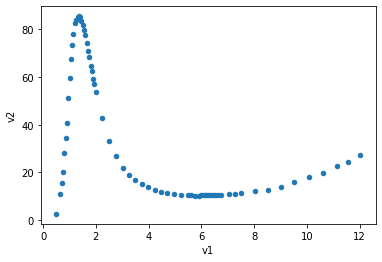

In [18]:
df1.plot(x='v1', y='v2', kind='scatter')

In [19]:
df1.loc[5:, :].sort_values('v2')

,v1,v2
45,5.895,10.27
44,5.757,10.30
46,6.004,10.35
47,6.083,10.36
48,6.163,10.39
...,...,...
17,1.450,83.55
13,1.241,83.85
16,1.398,84.99
14,1.310,85.28


In [20]:
E11 = [(1.310+1.348)/2, 0.048-0.010]
E12 = [(5.895+5.757)/2, 0.195-0.057]
E11, E12

([1.3290000000000002, 0.038], [5.826, 0.138])

In [21]:
l(E11[0]), l(E11[0])*(E11[1]/(2*E11[0]))

(3.1354410639542714, 0.04482571874727701)

In [22]:
3/2*l(E12[0]), 3/2*l(E12[0])*(E12[1]/(2*E12[0]))

(3.1894395905329604, 0.03777400132969006)

In [23]:
l1_static(E11, E12, sigma=True)

(3.2347065486777575, 0.05147919976604808)

In [24]:
u_static(E11, E12, sigma=True)

(2.2685999999999997, 0.129871936922493)

In [25]:
E_n(E11, E12, np.array([2, 3]), sigma=True)

(array([15.1504, 33.1384]), array([0.47609226, 1.03873223]))

## 2

<AxesSubplot:xlabel='v1', ylabel='v2'>

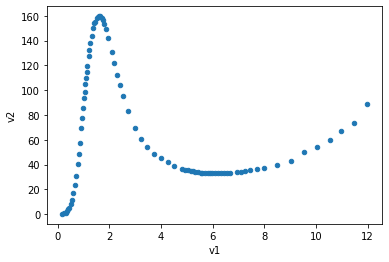

In [26]:
df2.plot(x='v1', y='v2', kind='scatter')

In [27]:
df2.loc[12:, :].sort_values('v2')

,v1,v2
62,5.828,33.12
63,5.906,33.13
61,5.721,33.16
64,5.991,33.20
65,6.104,33.22
...,...,...
34,1.713,158.20
30,1.509,158.28
31,1.564,159.37
33,1.644,159.60


In [28]:
E21 = [(1.610+1.644)/2, 0.044-0.010]
E22 = [(5.828+5.906)/2, 0.106-0.028]
E21, E22

([1.627, 0.033999999999999996], [5.867, 0.078])

In [29]:
l(E21[0]), l(E21[0])*(E21[1]/(2*E21[0]))

(3.020119243795698, 0.03155625515951251)

In [30]:
3/2*l(E22[0]), 3/2*l(E22[0])*(E22[1]/(2*E22[0]))

(3.181615542895763, 0.0211493107504576)

In [31]:
l1_static(E21, E22, sigma=True)

(3.3312973800268346, 0.033426186662923074)

In [32]:
u_static(E21, E22, sigma=True)

(1.7650000000000001, 0.08740251712622468)

In [33]:
E_n(E21, E22, np.array([2, 3]), sigma=True)

(array([14.328, 31.288]), array([0.28596643, 0.61883827]))

## 3

<AxesSubplot:xlabel='v1', ylabel='v2'>

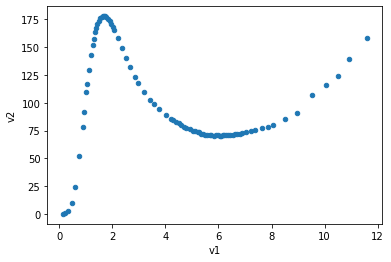

In [34]:
df3.plot(x='v1', y='v2', kind='scatter')

In [35]:
df3.loc[10:, :].sort_values('v2')

,v1,v2
61,6.050,70.50
62,6.103,70.60
58,5.845,70.62
56,5.674,70.65
60,5.979,70.66
...,...,...
23,1.770,176.99
19,1.601,177.31
22,1.725,177.64
20,1.644,177.77


In [36]:
E31 = [(1.698 + 1.644)/2, 0.098-0.044]
E32 = [(6.050 + 6.103)/2, 0.103-0.050]
E31, E32

([1.6709999999999998, 0.054000000000000006],
 [6.076499999999999, 0.05299999999999999])

In [37]:
l(E31[0]), l(E31[0])*(E31[1]/(2*E31[0]))

(3.0041473473616502, 0.0485409804780159)

In [38]:
3/2*l(E32[0]), 3/2*l(E32[0])*(E32[1]/(2*E32[0]))

(3.1425162935436366, 0.01370471188659695)

In [39]:
l1_static(E31, E32, sigma=True)

(3.2681255236438216, 0.028064756147650874)

In [40]:
u_static(E31, E32, sigma=True)

(1.8534000000000006, 0.10604527335058363)

In [41]:
E_n(E31, E32, np.array([2, 3]), sigma=True)

(array([14.8576, 32.4796]), array([0.26432858, 0.55500414]))

# Графики

In [42]:
def w(U, U0):
    return -np.log(U/U0)/10

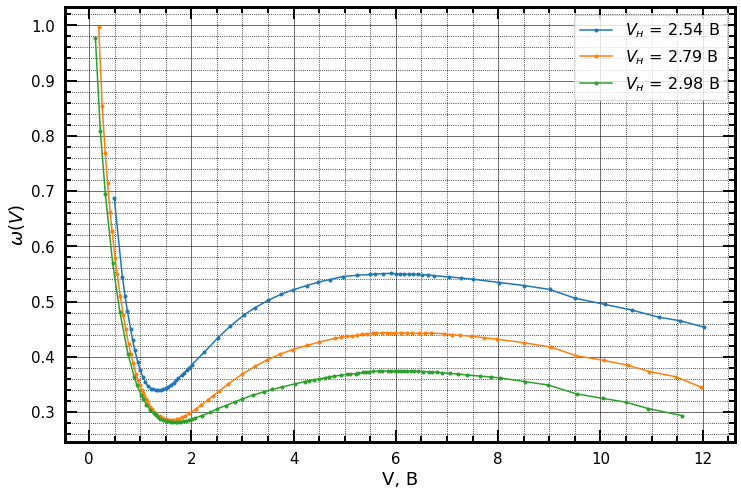

In [43]:
fig, ax = create_plot(12, 8)
ax.plot(df1['v1'], w(df1['v2']/1000, 2.540), '-', marker='.', label='$V_н$ = 2.54 B')
ax.plot(df2['v1'], w(df2['v2']/1000, 2.795), '-', marker='.', label='$V_н$ = 2.79 B')
ax.plot(df3['v1'], w(df3['v2']/1000, 2.983), '-', marker='.', label='$V_н$ = 2.98 B')

ax.set_xlabel('V, B', fontsize=18)
ax.set_ylabel('$\omega(V)$', fontsize=18)
ax.legend(fontsize=16)
plt.tight_layout()
fig.savefig('graphs/w.pdf')

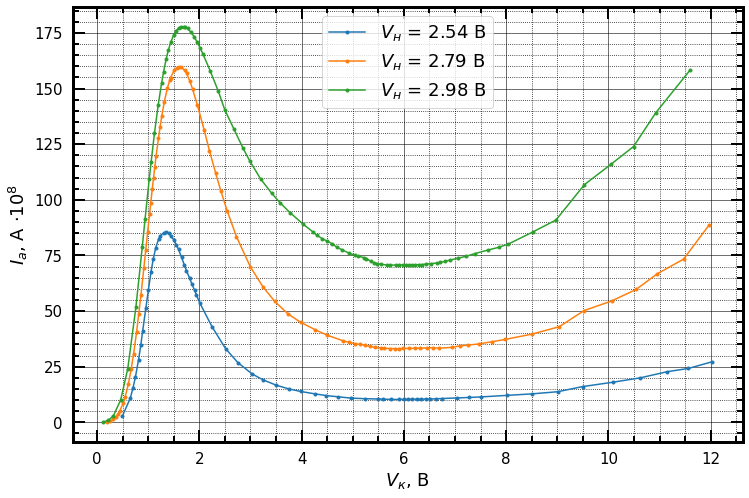

In [44]:
fig, ax = create_plot(12, 8)
df1.plot(x='v1', y='v2', ax=ax, marker='.', label='$V_н$ = 2.54 B')
df2.plot(x='v1', y='v2', ax=ax, marker='.', label='$V_н$ = 2.79 B')
df3.plot(x='v1', y='v2', ax=ax, marker='.', label='$V_н$ = 2.98 B')

ax.set_xlabel('$V_к$, B', fontsize=18)
ax.set_ylabel('$I_а$, А $\cdot 10^8$', fontsize=18)
ax.grid()
ax.legend(fontsize=18)
plt.tight_layout()
fig.savefig('graphs/vah.pdf')